In [2]:
import numpy as np
import pandas as pd
from lb5 import sub_grad_2
import random
import seaborn as sn
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 5) # (w, h)

Iters: 26
X inf: [3.1 1. ]
X sup: [1.9 2. ]


In [3]:
matrix_path = './02-12-2020_12-16-28/a_256x36.txt'
solution_path = './02-12-2020_12-16-28/sol.txt'
b_path = './02-12-2020_12-16-28/b.txt'

In [4]:
matrix = np.loadtxt(matrix_path)
sol = np.loadtxt(solution_path)
b = np.loadtxt(b_path)

Text(0.5, 1.0, 'Matrix 256*36 (transposed)')

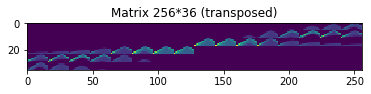

In [5]:
plt.imshow(matrix.T)
plt.title('Matrix 256*36 (transposed)')

# Разобьем матрицу на 2: левая верхняя и правая нижняя

In [6]:
m1 = matrix[:128, 18:]
m2 = matrix[128:, :18]

b1 = b[:128]
b2 = b[128:]

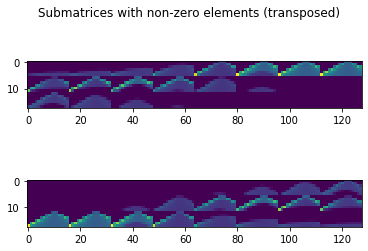

In [7]:
fig, axs = plt.subplots(2)
axs[0].imshow(m1.T)
axs[1].imshow(m2.T)
plt.suptitle('Submatrices with non-zero elements (transposed)')
plt.show()

In [273]:
df = pd.DataFrame(data=m1.T)
corrMatrix = df.corr()
sn.heatmap(corrMatrix)
plt.show()

In [103]:
np.count_nonzero(m1, axis=0)

array([ 12,  33,  56,  83, 115, 128,  15,  35,  55,  65,  67,  54,   3,
        12,  22,  33,  41,  41])

In [56]:
def generate_semi_random(matrix, b, nonzero_dict, initial_seq=None):
    initial_seq = random.sample(range(0, 128), 18)
    random_matrix = matrix[initial_seq, :]
    counter = 15
    while abs(np.linalg.det(random_matrix)) < 1e-8 and counter:
        print(abs(np.linalg.det(random_matrix)))
        counter -= 1
        nonz_vert = np.count_nonzero(random_matrix, axis=0)
        for idx, val in enumerate(nonz_vert):
            if not val:
                new_col_idx = random.choice(nonzero_dict[idx])
                random_matrix[idx, :] = matrix[new_col_idx, :]
                initial_seq[idx] = new_col_idx
#     if abs(np.linalg.det(random_matrix)) == 0.0:
#         random_matrix = random_matrix + 0.00001 * np.eye(min(random_matrix.shape))
    return random_matrix, b[initial_seq]
        

0.0
1.6193335957618833e-18
1.6193335957618833e-18
1.6193335957618833e-18
1.6193335957618833e-18
1.6193335957618833e-18
1.6193335957618833e-18
1.6193335957618833e-18
1.6193335957618833e-18
1.6193335957618833e-18
1.6193335957618833e-18
1.6193335957618833e-18
1.6193335957618833e-18
1.6193335957618833e-18
1.6193335957618833e-18


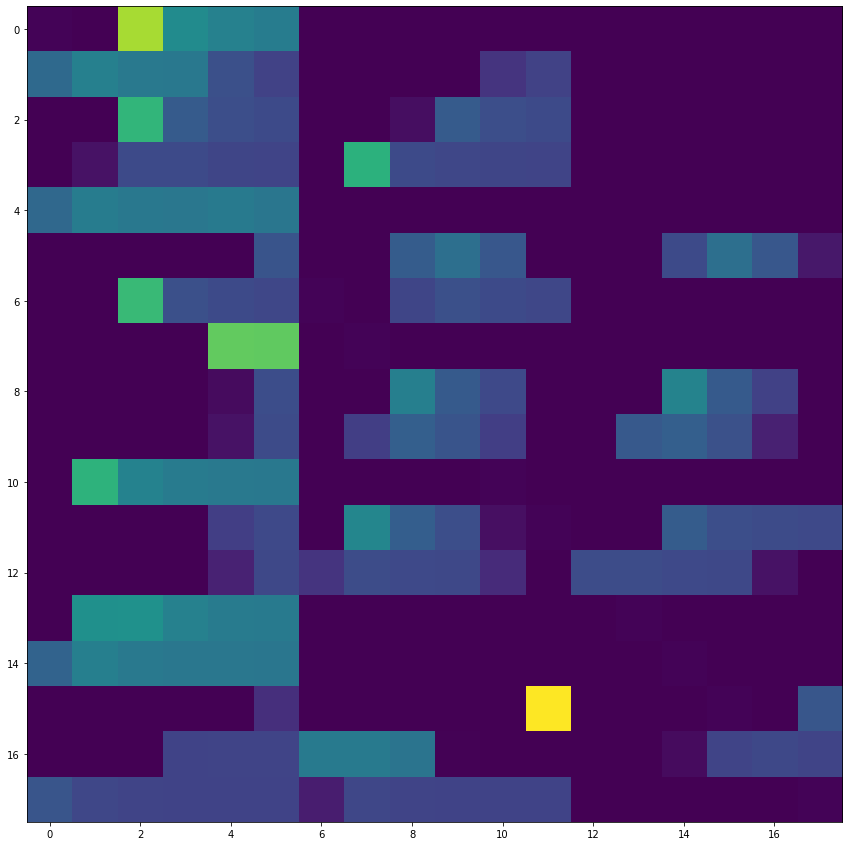

In [161]:
ma, b = generate_semi_random(m2, b2, nonzero_dict)
plt.imshow(ma)
plt.show()

In [160]:
np.linalg.det(ma)

-3.775791728395115e-13

In [9]:
def do_intersect(i1_low, i1_high, i2_low, i2_high):
    return i2_low <= i1_low <= i2_high or i2_low <= i1_high <= i2_high


def intervals_intersection(solutions_list):
    low, high = solutions_list[0]
    for l, h in solutions_list:
        for j in range(len(low)):
            if not do_intersect(low[j], high[j], l[j], h[j]):
                print('Не пересекаются ')
            low[j] = max(low[j], l[j])
            high[j] = min(high[j], h[j])
    return low, high

In [310]:
fig, axs = plt.subplots(2, 4)
axs[0, 0].imshow(mm[0])
axs[0, 1].imshow(mm[1])
axs[0, 2].imshow(mm[2])
axs[0, 3].imshow(mm[3])
axs[1, 0].imshow(mm[4])
axs[1, 1].imshow(mm[5])
axs[1, 2].imshow(mm[6])
axs[1, 3].imshow(mm[7])
plt.show()

In [53]:
def solve_non_square(matrix, b):
    nonzero_lines = {}
    for i in range(18):
        col = matrix[:, i]
        nonzero_lines[i] = np.array(np.nonzero(col)[0])
    solutions = []
    mm = []
    for i in range(2):
        square_matrix, square_b = generate_semi_random(matrix, b, nonzero_lines)
        mm.append(square_matrix)
        b_radius = np.full((square_b.shape[0]), 0.5)
        b_low, b_high = square_b - b_radius, square_b + b_radius
        (x_inf, x_sup), x_seq, iter_count = sub_grad_2(square_matrix, square_matrix, b_low, b_high)
        print(iter_count)
        solutions.append((x_inf, x_sup))
    return solutions, mm
    

In [65]:
# solutions, mm = solve_non_square(m1, b1)
# low, high = intervals_intersection(solutions)

solutions, mm = solve_non_square(m2, b2)
low, high = intervals_intersection(solutions)

0.0
4.8931926863503825e-12
4.8931926863503825e-12
4.8931926863503825e-12
4.8931926863503825e-12
4.8931926863503825e-12
4.8931926863503825e-12
4.8931926863503825e-12
4.8931926863503825e-12
4.8931926863503825e-12
4.8931926863503825e-12
4.8931926863503825e-12
4.8931926863503825e-12
4.8931926863503825e-12
4.8931926863503825e-12
1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 
Не пересекаются 


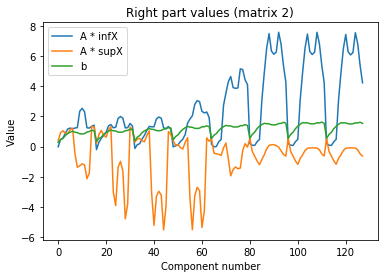

In [66]:
check_plot(m1, low, high, b1)

In [47]:
def plot_real_vs_solve(x_real, x_inf, x_sup):
    plt.plot(x_real, '*', label='real solution')
    plt.plot(x_inf, 'g-', label='found solution (inf)')
    plt.plot(x_sup, 'c-', label='found solution (sup)')
    plt.legend()
    plt.xlabel('Component number')
    plt.ylabel('Value')
    plt.title('1 matrix intersection (submatrix 2)')
    plt.show()

In [48]:
real = sol[:18]

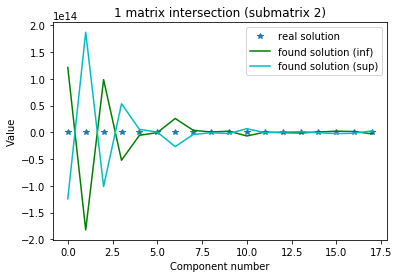

In [21]:
plot_real_vs_solve(real, low, high)

Попробуем проаерить решение для одной матрицы: какие получаеются правые части при умножении A на решение

In [22]:
def check_plot(matrix, x_inf, x_sup, b):
    b_dot_inf = np.dot(matrix, x_inf)
    b_dot_sup = np.dot(matrix, x_sup)
    plt.plot(b_dot_inf, label='A * infX')
    plt.plot(b_dot_sup, label='A * supX')
    plt.plot(b, label='b')
    plt.legend()
    plt.xlabel('Component number')
    plt.ylabel('Value')
    plt.title('Right part values (matrix 2)')
    plt.show()